In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import json

In [2]:
df = pd.read_csv('synthetic_fraud_dataset_150k.csv')
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER,fraud
0,461,1563.975856,46711.025835,45147.049978,41400.388129,42964.363986,5,1,0.033481,-1563.975856,1563.975856,0,0,1.0,0.0
1,384,141370.196393,450842.840467,309472.644075,66158.925256,207529.121649,0,1,0.313568,-141370.196393,141370.196393,0,0,0.0,0.0
2,668,111666.008592,116341.601828,4675.593236,0.000000,0.000000,20,0,0.959803,-111666.008592,0.000000,0,1,1.0,1.0
3,386,79947.674894,162355.214907,82407.540013,22093.909306,102041.584200,2,1,0.492421,-79947.674894,79947.674894,0,0,1.0,0.0
4,560,977822.618593,996564.201209,18741.582616,0.000000,0.000000,8,0,0.981193,-977822.618593,0.000000,0,1,1.0,1.0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER,fraud
count,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.000000,143304.0,143304.000000,143304.000000,143303.000000
mean,372.870939,143487.248626,301295.087474,157807.838848,199633.594350,249813.778787,11.501821,0.249323,0.385262,-143487.248626,50180.184437,0.0,0.200357,0.440190,0.200359
std,214.775169,206827.477385,208321.759304,120729.714524,163237.404941,186328.827057,6.919718,0.432623,0.300194,206827.477385,55437.994148,0.0,0.400269,0.496412,0.400270
min,1.000000,10.215519,1002.384526,1.166789,0.000000,0.000000,0.000000,0.000000,0.000025,-998884.005690,0.000000,0.0,0.000000,0.000000,0.000000
25%,187.000000,22694.392833,139867.974714,49990.667444,30753.634606,75622.294285,6.000000,0.000000,0.156076,-146772.763881,2918.360813,0.0,0.000000,0.000000,0.000000
50%,373.000000,65066.429854,279031.387126,135955.081554,186765.379159,249571.179309,11.000000,0.000000,0.312477,-65066.429854,30155.302228,0.0,0.000000,0.000000,0.000000
75%,559.000000,146772.763881,417669.473867,248371.237933,343047.069628,406380.613521,18.000000,0.000000,0.468950,-22694.392833,81221.595355,0.0,0.000000,1.000000,0.000000
max,744.000000,998884.005690,999993.771631,499198.436625,499997.304628,738787.548516,23.000000,1.000000,0.999995,-10.215519,248998.748943,0.0,1.000000,1.000000,1.000000


In [10]:
df.isna().sum()

,0
step,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
hour,0
is_night,0
amount_ratio,0
sender_balance_change,0


In [12]:
df = df.dropna()

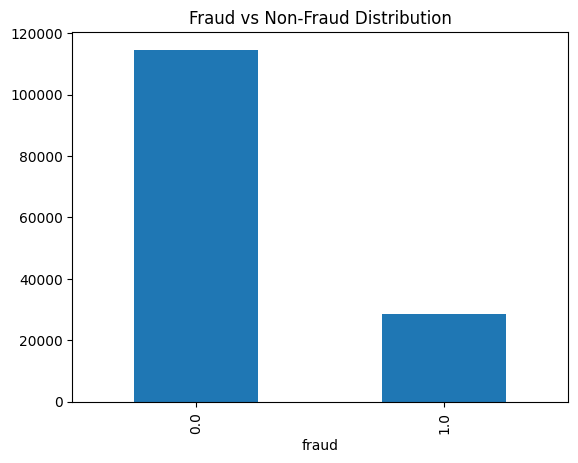

In [13]:
df['fraud'].value_counts().plot(kind='bar')
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

In [14]:
X = df.drop('fraud', axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       random_state=42)

In [17]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22919
         1.0       1.00      1.00      1.00      5742

    accuracy                           1.00     28661
   macro avg       1.00      1.00      1.00     28661
weighted avg       1.00      1.00      1.00     28661

ROC-AUC: 1.0


In [19]:
joblib.dump(model, 'random_forest_model_v1.joblib')
joblib.dump(scaler, 'scaler_v1.joblib')
with open('features_name.json', 'w') as f:
    json.dump(list(X.columns), f)

In [20]:
import joblib
import pandas as pd
import json

# Load the saved model, scaler, and feature names
model = joblib.load('random_forest_model_v1.joblib')
scaler = joblib.load('scaler_v1.joblib')
with open('features_name.json', 'r') as f:
    feature_names = json.load(f)

print("Model, scaler, and feature names loaded successfully!")

Model, scaler, and feature names loaded successfully!


Now, let's create two sample scenarios for prediction. These scenarios should have the same features as the training data, in the correct order.

In [29]:
# Example Case 1: Low-risk transaction
case_1 = {
    'step': 100,
    'amount': 500.00,
    'oldbalanceOrg': 10000.00,
    'newbalanceOrig': 9500.00,
    'oldbalanceDest': 5000.00,
    'newbalanceDest': 5500.00,
    'hour': 10,
    'is_night': 0,
    'amount_ratio': 0.05,
    'sender_balance_change': -500.00,
    'receiver_balance_change': 500.00,
    'orig_balance_zero': 0,
    'dest_balance_zero': 0,
    'type_TRANSFER': 0
}

# Example Case 2: Potentially high-risk transaction (e.g., large amount, zero balances)
case_2 = {
    'step': 300,
    'amount': 150000.00,
    'oldbalanceOrg': 150000.00,
    'newbalanceOrig': 0.00,
    'oldbalanceDest': 0.00,
    'newbalanceDest': 150000.00,
    'hour': 3,
    'is_night': 1,
    'amount_ratio': 1.00,
    'sender_balance_change': -150000.00,
    'receiver_balance_change': 150000.00,
    'orig_balance_zero': 1,
    'dest_balance_zero': 1,
    'type_TRANSFER': 1
}

# Example Case 3: Medium-risk transaction
case_3 = {
    'step': 350,
    'amount': 75000.00,
    'oldbalanceOrg': 100000.00,
    'newbalanceOrig': 25000.00,
    'oldbalanceDest': 20000.00,
    'newbalanceDest': 95000.00,
    'hour': 18,
    'is_night': 0,
    'amount_ratio': 0.75,
    'sender_balance_change': -75000.00,
    'receiver_balance_change': 75000.00,
    'orig_balance_zero': 0,
    'dest_balance_zero': 0,
    'type_TRANSFER': 1
}

# Create a DataFrame from the sample cases, ensuring the column order matches the training data
sample_data = pd.DataFrame([case_1, case_2, case_3], columns=feature_names)
display(sample_data.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,100,500.0,10000.0,9500.0,5000.0,5500.0,10,0,0.05,-500.0,500.0,0,0,0
1,300,150000.0,150000.0,0.0,0.0,150000.0,3,1,1.00,-150000.0,150000.0,1,1,1
2,350,75000.0,100000.0,25000.0,20000.0,95000.0,18,0,0.75,-75000.0,75000.0,0,0,1


Next, we'll scale the sample data using the loaded `scaler` and then use the `model` to predict the fraud activity and its probability.

In [32]:
# Scale the sample data
sample_data_scaled = scaler.transform(sample_data)

# Predict fraud activity (0 or 1)
predictions = model.predict(sample_data_scaled)

# Predict fraud probabilities
probabilities = model.predict_proba(sample_data_scaled)[:, 1]

# Display the results
results = pd.DataFrame({
    'Case': ['Case 1', 'Case 2', 'Case 3'],
    'Predicted_Fraud': predictions,
    'Fraud_Probability': probabilities
})

display(results)

,Case,Predicted_Fraud,Fraud_Probability
0,Case 1,0.0,0.000
1,Case 2,1.0,0.565
2,Case 3,0.0,0.170


In [33]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
display(importance_df)


,Feature,Importance
10,receiver_balance_change,2.067107e-01
5,newbalanceDest,2.013518e-01
12,dest_balance_zero,1.750185e-01
8,amount_ratio,1.420425e-01
4,oldbalanceDest,1.388908e-01
9,sender_balance_change,6.076370e-02
1,amount,3.978012e-02
13,type_TRANSFER,2.405102e-02
2,oldbalanceOrg,6.605522e-03
3,newbalanceOrig,4.782780e-03


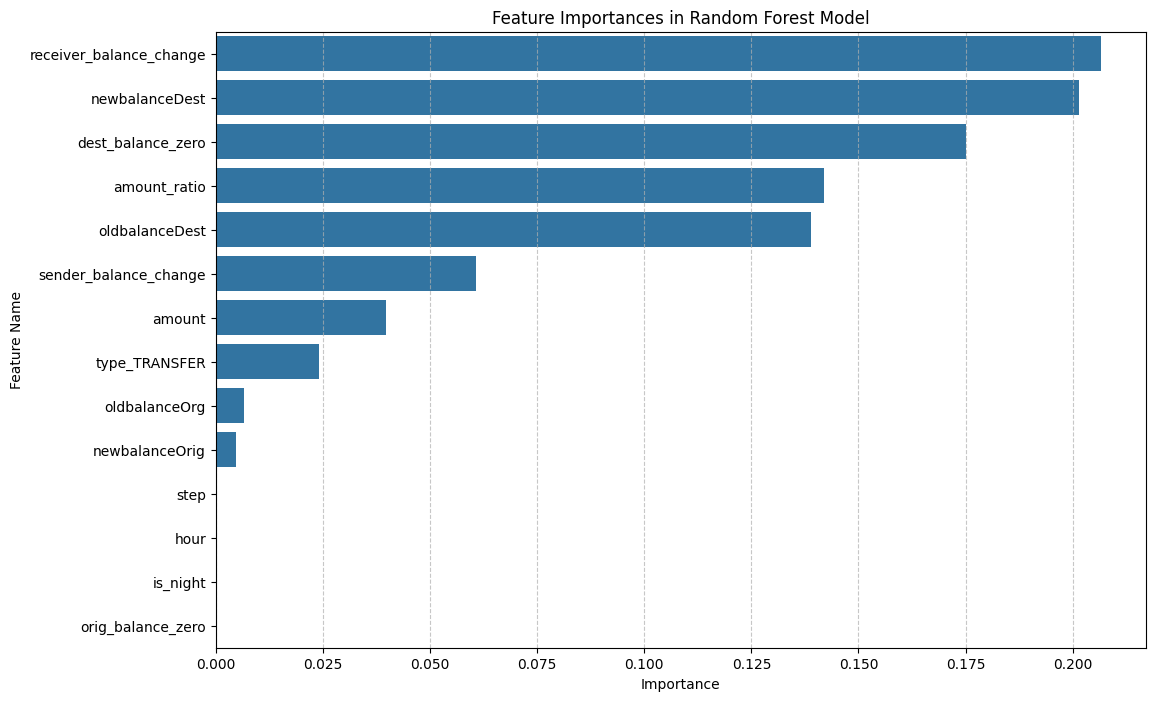

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This bar chart visually represents the importance of each feature in the fraud detection model, making it easy to identify the most influential factors.

This table shows the importance of each feature in predicting fraud, with higher values indicating greater influence on the model's decisions.

Let's define a function to assign risk levels and actions based on the predicted fraud probabilities.

In [35]:
def assign_risk_level_and_action(probability):
    if probability <= 0.1:  # Example threshold for low risk
        return 'Low', 'Approved'
    elif probability <= 0.5: # Example threshold for medium risk
        return 'Medium', 'Trigger MFA'
    else:
        return 'High', 'Block'

# Apply the function to the Fraud_Probability column in the results DataFrame
results[['Risk_Level', 'Action']] = results['Fraud_Probability'].apply(lambda x: pd.Series(assign_risk_level_and_action(x)))

# Display the updated results
display(results)

,Case,Predicted_Fraud,Fraud_Probability,Risk_Level,Action
0,Case 1,0.0,0.000,Low,Approved
1,Case 2,1.0,0.565,High,Block
2,Case 3,0.0,0.170,Medium,Trigger MFA


In this code, I've set example thresholds:
- **Low Risk (Approved):** Fraud Probability <= 0.1
- **Medium Risk (Trigger MFA):** 0.1 < Fraud Probability <= 0.5
- **High Risk (Block):** Fraud Probability > 0.5

You can modify these thresholds in the `assign_risk_level_and_action` function to better suit your business requirements and risk tolerance.